In [2]:
import os

data_dir = '../data/paper_final_results/'
os.listdir(data_dir)

['accuracy_seeds', 'arch2vec_orig_seeds', 'baselines', 'info-nas_seeds']

In [3]:
import pandas as pd

res_losses = []
res_metrics = []
res_names = {
    'accuracy': 'Accuracy model',
    'info-nas': 'IO model'
}

for seed in range(1, 4):
    for infonas_type in ['accuracy', 'info-nas']:
        curr_path = os.path.join(data_dir, f"{infonas_type}_seeds", f"seed_{seed}")
        losses = pd.read_csv(os.path.join(curr_path, 'loss.csv')).rename(columns={'Unnamed: 0': 'epoch'})
        metrics = pd.read_csv(os.path.join(curr_path, 'metrics.csv')).rename(columns={'Unnamed: 0': 'epoch'})
        
        losses['algo'] = res_names[infonas_type]
        losses['seed'] = seed
        
        metrics['algo'] = res_names[infonas_type]
        metrics['seed'] = seed
        
        res_losses.append(losses)
        res_metrics.append(metrics)
        
res_losses = pd.concat(res_losses, ignore_index=True)
res_metrics = pd.concat(res_metrics, ignore_index=True)

In [4]:
res_losses.columns

Index(['epoch', 'labeled_total', 'labeled_unlabeled', 'labeled_labeled',
       'unlabeled_total', 'unlabeled_unlabeled', 'unlabeled_labeled',
       'reference_total', 'reference_unlabeled', 'reference_labeled', 'algo',
       'seed'],
      dtype='object')

In [5]:
res_metrics.columns

Index(['epoch', 'labeled_valid_unseen_networks-val_loss',
       'labeled_valid_unseen_networks-MSE', 'labeled_valid_unseen_networks-L1',
       'labeled_valid_unseen_networks-val_loss_min',
       'labeled_valid_unseen_networks-val_loss_max',
       'labeled_valid_unseen_networks-val_loss_std',
       'labeled_valid_unseen_networks-val_loss_median',
       'labeled_valid_unseen_images-val_loss',
       'labeled_valid_unseen_images-MSE', 'labeled_valid_unseen_images-L1',
       'labeled_valid_unseen_images-val_loss_min',
       'labeled_valid_unseen_images-val_loss_max',
       'labeled_valid_unseen_images-val_loss_std',
       'labeled_valid_unseen_images-val_loss_median', 'labeled_acc_ops_val',
       'labeled_mean_corr_adj_val', 'labeled_mean_fal_pos_adj_val',
       'labeled_acc_adj_val', 'unlabeled_validity', 'unlabeled_uniqueness',
       'unlabeled_acc_ops_val', 'unlabeled_mean_corr_adj_val',
       'unlabeled_mean_fal_pos_adj_val', 'unlabeled_acc_adj_val',
       'running_time'

In [6]:
info_losses = res_losses[res_losses['algo'] == res_names['info-nas']]
acc_losses = res_losses[res_losses['algo'] == res_names['accuracy']]

info_metrics = res_metrics[res_metrics['algo'] == res_names['info-nas']]
acc_metrics = res_metrics[res_metrics['algo'] == res_names['accuracy']]

In [94]:
print(os.listdir(f"{data_dir}/baselines"))

def get_base(name, ci=False, n=None):
    r = pd.read_csv(f"{data_dir}/baselines/{name}")
    if ci:
        print(r)
        return round(1.96 / np.sqrt(n) * r.iloc[0]['std'], 4)
    return r.iloc[0]['mean']

import pandas as pd

n_train = 608000 / 32
n_val = 77000 / 32
n_valim = 122000 / 32

train_base = get_base('train_long_baseline.csv')
val_net_base = get_base('valid_long_baseline.csv')
val_img_base = get_base('test_train_long_baseline.csv')

train_base_ci = get_base('train_long_baseline.csv', ci=True, n=n_train)
val_net_base_ci = get_base('valid_long_baseline.csv', ci=True, n=n_val)
val_img_base_ci = get_base('test_train_long_baseline.csv', ci=True, n=n_valim)

['test_train_long_baseline.csv', 'test_train_long_larger_baseline.csv', 'test_valid_long_baseline.csv', 'train_long_baseline.csv', 'valid_long_baseline.csv']
   Unnamed: 0 loss_name      mean       std       min       max    median
0           0       MSE  0.031186  0.042479  0.006847  2.337090  0.021430
1           1        L1  0.122596  0.032398  0.064482  0.394000  0.115289
2           2     Huber  0.014824  0.012160  0.003423  0.218728  0.010711
   Unnamed: 0 loss_name      mean       std       min       max    median
0           0       MSE  0.027520  0.021149  0.007037  0.276886  0.020156
1           1        L1  0.118698  0.030187  0.064939  0.260520  0.111516
2           2     Huber  0.013551  0.009589  0.003519  0.077589  0.010078
   Unnamed: 0 loss_name      mean       std       min       max    median
0           0       MSE  0.032591  0.025286  0.008272  0.265399  0.022578
1           1        L1  0.128574  0.036583  0.072557  0.315815  0.117882
2           2     Huber  0.0

In [79]:
round(train_base_ci, 3)

0.048

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

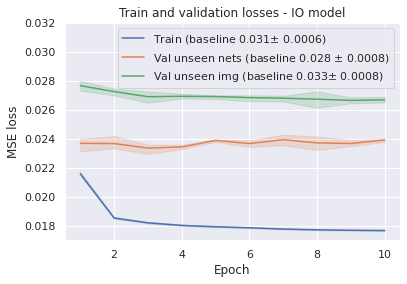

In [98]:
save_dir = '.'

sns.lineplot(data=info_losses, x='epoch', y='labeled_labeled',
             label=f'Train (baseline {round(train_base,3)}$\pm$ {train_base_ci})')
sns.lineplot(data=info_metrics, x='epoch', y='labeled_valid_unseen_networks-val_loss',
             label=f'Val unseen nets (baseline {round(val_net_base,3)} $\pm$ {val_net_base_ci})')
sns.lineplot(data=info_metrics, x='epoch', y='labeled_valid_unseen_images-val_loss',
             label=f'Val unseen img (baseline {round(val_img_base,3)}$\pm$ {val_img_base_ci})')
plt.legend()
plt.ylim(0.017, 0.032)
plt.title('Train and validation losses - IO model')
plt.ylabel('MSE loss')
plt.xlabel('Epoch')
plt.savefig(f"{save_dir}/loss.png")
plt.show()

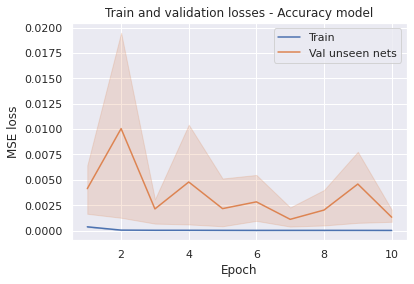

In [97]:
sns.lineplot(data=acc_losses, x='epoch', y='labeled_labeled', label='Train')
sns.lineplot(data=acc_metrics, x='epoch', y='labeled_valid_unseen_networks-val_loss', label='Val unseen nets')
plt.title('Train and validation losses - Accuracy model')
plt.ylabel('MSE loss')
plt.xlabel('Epoch')
plt.savefig(f"{save_dir}/lossacc.png")
plt.show()

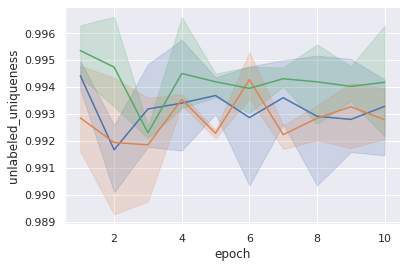

In [11]:
sns.lineplot(data=acc_metrics, x='epoch', y='unlabeled_uniqueness')
sns.lineplot(data=info_metrics, x='epoch', y='unlabeled_uniqueness')
sns.lineplot(data=info_metrics, x='epoch', y='reference_uniqueness')
plt.show()

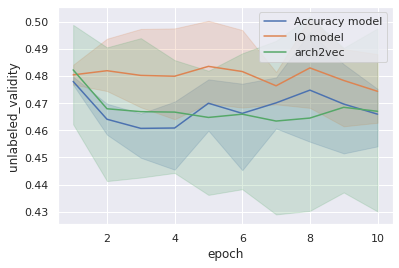

In [12]:
sns.lineplot(data=acc_metrics, x='epoch', y='unlabeled_validity', label='Accuracy model')
sns.lineplot(data=info_metrics, x='epoch', y='unlabeled_validity', label='IO model')
sns.lineplot(data=info_metrics, x='epoch', y='reference_validity', label='arch2vec')
plt.legend()
plt.show()

In [13]:
def plot_compare_metric(what):
    sns.lineplot(data=acc_metrics, x='epoch', y=f'unlabeled_{what}', label='Accuracy model')
    sns.lineplot(data=info_metrics, x='epoch', y=f'unlabeled_{what}', label='IO model')
    sns.lineplot(data=info_metrics, x='epoch', y=f'reference_{what}', label='arch2vec')
    plt.legend()

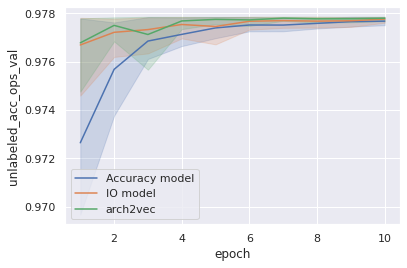

In [14]:
plot_compare_metric('acc_ops_val')
plt.show()

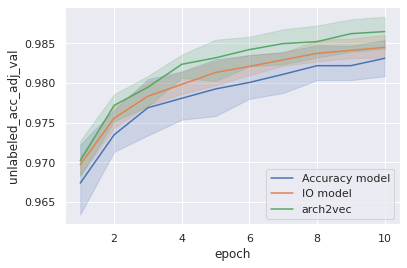

In [15]:
plot_compare_metric('acc_adj_val')

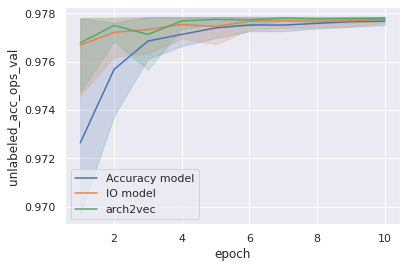

In [16]:
plot_compare_metric('acc_ops_val')

In [17]:
# z tohodle a z recon acc tabulku
acc_metrics[acc_metrics['epoch'] == 10]['unlabeled_validity'].describe()

count    3.000000
mean     0.465967
std      0.010825
min      0.454100
25%      0.461300
50%      0.468500
75%      0.471900
max      0.475300
Name: unlabeled_validity, dtype: float64

In [18]:
acc_metrics[acc_metrics['epoch'] == 10][['running_time', 'seed']]

,running_time,seed
9,3507.639107,1
29,3553.670931,2
49,3573.292845,3


In [19]:
info_metrics[info_metrics['epoch'] == 10][['running_time', 'seed']]

,running_time,seed
19,9222.562636,1
39,9165.429922,2
59,9542.776562,3


In [95]:
os.listdir(data_dir)

test_img_base = get_base('test_train_long_larger_baseline.csv')
print(round(test_img_base, 4))
test_val_base = get_base('test_valid_long_baseline.csv')
print(round(test_val_base, 4))

test_img_base_ci = get_base('test_train_long_larger_baseline.csv', ci=True, n=1094000)
test_val_base_ci = get_base('test_valid_long_baseline.csv', ci=True, n=154000)
print(test_img_base_ci, test_val_base_ci)

res_test = {}

for path in ['test_train_long.pt_larger.csv', 'test_valid_long.pt_larger.csv']:
    res = []
    for i in range(1,4):
        val = pd.read_csv(f"{data_dir}/info-nas_seeds/seed_{i}/{path}")
        val = val['MSE'].iloc[0]
        res.append(val)
    res_test[path] = round(np.mean(res), 4)
    res_test[f"{path}_std"] = round(np.std(res), 4)
res_test

0.0361
0.0319
   Unnamed: 0 loss_name      mean       std       min       max    median
0           0       MSE  0.036083  0.032747  0.011848  0.492489  0.025749
1           1        L1  0.132638  0.032119  0.084505  0.329423  0.124991
2           2     Huber  0.016990  0.011422  0.005924  0.120825  0.012865
   Unnamed: 0 loss_name      mean       std       min       max    median
0           0       MSE  0.031879  0.019508  0.011451  0.111888  0.024325
1           1        L1  0.128906  0.029720  0.083204  0.228313  0.120276
2           2     Huber  0.015662  0.009248  0.005725  0.053151  0.012162
0.0001 0.0001


{'test_train_long.pt_larger.csv': 0.0299,
 'test_train_long.pt_larger.csv_std': 0.0002,
 'test_valid_long.pt_larger.csv': 0.0279,
 'test_valid_long.pt_larger.csv_std': 0.0002}

In [21]:

pd.read_csv(f"{data_dir}/info-nas_seeds/seed_3/test_train_long.pt_larger.csv")

,val_loss,MSE,L1,val_loss_min,val_loss_max,val_loss_std,val_loss_median
0,0.029725,0.029725,0.119299,0.009438,0.473334,0.027937,0.022308


In [22]:

pd.read_csv(f"{data_dir}/info-nas_seeds/seed_2/test_train_long.pt_larger.csv")

,val_loss,MSE,L1,val_loss_min,val_loss_max,val_loss_std,val_loss_median
0,0.029827,0.029827,0.120012,0.008084,0.471304,0.027692,0.022826


In [25]:
info_epoch_10 = info_metrics[info_metrics['epoch'] == 10]
acc_epoch_10 = acc_metrics[acc_metrics['epoch'] == 10]
acc_epoch_10

,epoch,labeled_valid_unseen_networks-val_loss,labeled_valid_unseen_networks-MSE,labeled_valid_unseen_networks-L1,labeled_valid_unseen_networks-val_loss_min,labeled_valid_unseen_networks-val_loss_max,labeled_valid_unseen_networks-val_loss_std,labeled_valid_unseen_networks-val_loss_median,labeled_valid_unseen_images-val_loss,labeled_valid_unseen_images-MSE,...,unlabeled_acc_adj_val,running_time,algo,seed,reference_validity,reference_uniqueness,reference_acc_ops_val,reference_mean_corr_adj_val,reference_mean_fal_pos_adj_val,reference_acc_adj_val
9,10,0.002065,0.002065,0.032788,3.016830e-07,0.029246,0.004792,0.000557,0.007064,0.007064,...,0.980849,3507.639107,Accuracy model,1,NaN,NaN,NaN,NaN,NaN,NaN
29,10,0.000863,0.000863,0.021289,7.656183e-09,0.020600,0.002378,0.000309,0.006006,0.006006,...,0.985424,3553.670931,Accuracy model,2,NaN,NaN,NaN,NaN,NaN,NaN
49,10,0.001031,0.001031,0.021317,3.012610e-08,0.021078,0.003096,0.000290,0.003425,0.003425,...,0.983077,3573.292845,Accuracy model,3,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
import numpy as np

def get_all_three(what, label, rnd=3):
    info = info_epoch_10[f'unlabeled_{what}']
    ref = info_epoch_10[f'reference_{what}']
    acc = acc_epoch_10[f'unlabeled_{what}']
    
    res = []
    for val, name in zip([ref, acc, info], ['arch2vec', 'Accuracy Model', 'IO Model']):
        res.append({
            'name': name, f'{label} mean': round(np.mean(val), rnd),
            f'{label} std': round(np.std(val), rnd)
        })
    return pd.DataFrame(res)

In [50]:
get_all_three('validity', 'validity')

,name,validity mean,validity std
0,arch2vec,0.467,0.028
1,Accuracy Model,0.466,0.009
2,IO Model,0.474,0.010


In [51]:
get_all_three('uniqueness', 'uniqueness')

,name,uniqueness mean,uniqueness std
0,arch2vec,0.994,0.002
1,Accuracy Model,0.993,0.001
2,IO Model,0.993,0.001


In [52]:
info_epoch_10.columns

Index(['epoch', 'labeled_valid_unseen_networks-val_loss',
       'labeled_valid_unseen_networks-MSE', 'labeled_valid_unseen_networks-L1',
       'labeled_valid_unseen_networks-val_loss_min',
       'labeled_valid_unseen_networks-val_loss_max',
       'labeled_valid_unseen_networks-val_loss_std',
       'labeled_valid_unseen_networks-val_loss_median',
       'labeled_valid_unseen_images-val_loss',
       'labeled_valid_unseen_images-MSE', 'labeled_valid_unseen_images-L1',
       'labeled_valid_unseen_images-val_loss_min',
       'labeled_valid_unseen_images-val_loss_max',
       'labeled_valid_unseen_images-val_loss_std',
       'labeled_valid_unseen_images-val_loss_median', 'labeled_acc_ops_val',
       'labeled_mean_corr_adj_val', 'labeled_mean_fal_pos_adj_val',
       'labeled_acc_adj_val', 'unlabeled_validity', 'unlabeled_uniqueness',
       'unlabeled_acc_ops_val', 'unlabeled_mean_corr_adj_val',
       'unlabeled_mean_fal_pos_adj_val', 'unlabeled_acc_adj_val',
       'running_time'

In [53]:
get_all_three('acc_adj_val', 'Adj Recon Acc')

,name,Adj Recon Acc mean,Adj Recon Acc std
0,arch2vec,0.986,0.002
1,Accuracy Model,0.983,0.002
2,IO Model,0.985,0.001


In [54]:
get_all_three('acc_ops_val', 'Ops Recon Acc')

,name,Ops Recon Acc mean,Ops Recon Acc std
0,arch2vec,0.978,0.0
1,Accuracy Model,0.978,0.0
2,IO Model,0.978,0.0


In [57]:
acc_epoch_10['running_time'].mean()

3544.8676274860004

In [58]:
info_epoch_10['running_time'].mean()

9310.256373420334